In [1]:
import math
from heapq import heappush, heappop
# A* Algorithm

# 1. Neighbors_and_weights can be an adjacency / weights list
#   a. Weights will hold temporal value
#   b. Want to reduce memory by implementing list of arrays rahter than an nxn matrix.
#      weights[node[i].key] = ((neighbor1.key, weight), (neighbor2.key, weight), ... )
# 2. An array pathTO will be used to keep track of our optimal route

v = 10000                              # length of nodes - test value 5
neighbors_and_weights = v*[]        # TBD
pathTo = v*[-1]                     # keeps track of optimal path

class Node:                                                  # the node's index in the list will be its key
    def __init__(self, key, x_coord, y_coord, neighbors_and_weights = []):  
        self.key = key                                       # needed to record pathTo
        self.x_coord = x_coord                               # coordinates to be used to determine distance(probably)
        self.y_coord = y_coord
        self.neighbors_and_weights = []                      # neighbors and weights adjacency list
        self.g_score = 'inf'                                 # score of path from starting point to this vertex - TBD      
        self.f_score = 'inf'                                 # f_score = g_score + h_score
        
        # a. Maybe we could add another property here for pre-processing(something like "reach")
        #    Possibly employ some kind of density value of time per unit length since we have a time based metric
        # b. Can also add other values here as we need
            
def Heuristic(current_node, terminal_node):  # determines h_score - score of path from this vertex to goal - Euclidean
    current = current_node    # initial walking speed ~ 30 seconds per 50 meters(unit length) 
    goal = terminal_node      # can change this according to our map and increasing number of nodes

    Euclidean = math.sqrt(abs(current.x_coord - goal.x_coord)**2 + abs(current.y_coord - goal.y_coord)**2)
    h_score = Euclidean * 0.5            # half a minute(30 seconds) per unit length
    
    return h_score                       # so all our scores will be in minutes


def retrieve_path(pathTo, start, end):     # returns path
    parent = pathTo[end]
    path = [end]
    print end
    while  parent != start:
        print parent
        path.append(parent)
        parent = pathTo[parent]
    print start
    path.append(start)          # appending the starting point
    
    # return the full path from the end to start
    return path
    
# 3. F_score = g_score + h_score will be determined at each iteration
# 4. Will use "sets" as our data structure because of its innate prowess at finding if a key exists in the set
#   a. Sets are also good for finding the min value, which we will use for f_score
# 5. Will need to check for out of bounds (starting and ending points)

def A_star(Nodes, start, end):
    if start < 0 | start > v:
        return "The starting point doesn't exist in UCLA!"
    if end < 0 | end > v:
        return "The end point doesn't exist in UCLA!"
    
    closed_set = set()     # will store nodes that are visited
    open_set = set()       # will store nodes that are neighbors in the optimal path (minimaum f_score)
    
    goal = Nodes[end]
    entry = Nodes[start]                     # starting node
    entry.g_score = 0                        # starting node g_score is 0
    entry.f_score = Heuristic(entry, goal)   # starting node f_score = g_score + h_score 
    open_set.add((entry.f_score, entry))
    
    while (len(open_set) > 0):
        current = min(open_set)[1]       # pick node with lowest f_score
        
        if current == goal:
            return current.f_score      # returns estimated time - **can a function return 2 different value types?**
        
        open_set.remove((current.f_score, current))        # remove chosen node from open_set
        closed_set.add(current)                           # add chosen node to closed_set
        
        for i in current.neighbors_and_weights:
            if Nodes[i[0]] in closed_set:    # if Nodes[neighbor.key] is in closed set - do nothing
                continue                     
                                             # i[1] = weight of edge between current and neighbor
            g_new = current.g_score + i[1]   # compute new g_score
            
            if (Nodes[i[0]].f_score,Nodes[i[0]]) in open_set:  # if there is a duplicate of Nodes[neighbor.key] in open_set
                if Nodes[i[0]].g_score > g_new:   # compare new g_score and update if new score is lower
                    Nodes[i[0]].g_score = g_new
                    
            else:
                Nodes[i[0]].g_score = g_new                                 # if in neither, update g_score
                Nodes[i[0]].f_score = g_new + Heuristic(Nodes[i[0]], goal)  # calculate h_score and f_score
                pathTo[i[0]] = current.key                                     # record path to parent
                open_set.add((Nodes[i[0]].f_score, Nodes[i[0]]))            # add to open_set
                
    # Will not need to return anything here as our graph will be connected and will therfore always find a path.
    

In [2]:
import random
P=.2
N=100

def randomGraph(n,p):
    Edges=[[] for i in range(n)];
    for i in range(n):
        for j in range(i+1,n):
            if (random.uniform(0,1)<p):
                (Edges[i]).append((j,j))
                (Edges[j]).append((i,i))
    return Edges

def randomnode(N,P):
    neighbors_and_weights=randomGraph(N,P)
    nodes=[]
    for i in range(N):
        node=Node(i,random.randint(-10,10),random.randint(-10,10),neighbors_and_weights[i])
        node.neighbors_and_weights=neighbors_and_weights[i]
        nodes.append(node)
    return nodes

nodes=randomnode(N,P)

In [3]:
print nodes[0].key
print nodes[0].x_coord,nodes[0].y_coord
print nodes[0].neighbors_and_weights
print Heuristic(nodes[0],nodes[1])

0
6 -9
[(1, 1), (5, 5), (6, 6), (15, 15), (20, 20), (26, 26), (36, 36), (39, 39), (44, 44), (51, 51), (52, 52), (53, 53), (57, 57), (69, 69), (71, 71), (73, 73), (82, 82), (87, 87), (90, 90), (97, 97)]
1.58113883008


In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline

""" Visualizing the graph in 2-dimensional space 
    the input variable 'path' is defaulted to None
    path is a list of Nodes                        """
def visualize_graph(nodes, path = None):
    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    
    x_coord = ['inf' for i in range(N)]
    y_coord = ['inf' for j in range(N)]
    # for better time complexity
    closed_key = []
    
    # for every node in the graph
    for node in nodes:
        x,y =(node.x_coord, node.y_coord)
        x_coord[node.key]= x
        y_coord[node.key]= y
        closed_key.append(node.key)
        # for every neighboring node
        for neigh_key_weight in node.neighbors_and_weights:
            if neigh_key_weight[0] not in closed_key:
                neigh_x = nodes[neigh_key_weight[0]].x_coord
                neigh_y = nodes[neigh_key_weight[0]].y_coord
                line1 = lines.Line2D((x,neigh_x),(y, neigh_y)
                                         , linewidth = 1
                                         , color = 'red')
                ax.add_line(line1)
    # scatter all points
    plt.scatter(x_coord, y_coord)
    # label all points by the key
    for key in closed_key:
        plt.annotate(str(key), (x_coord[key], y_coord[key]), textcoords='data')
        
    if path != None:  # if path is input
        x_coord = []
        y_coord = []
        for p in path:
            x_coord.append(p.x_coord)
            y_coord.append(p.y_coord)
        plt.plot(x_coord, y_coord, color = 'blue')
        
    plt.show()

In [5]:
A_star(nodes,1,99)

# path list of key
path_by_key = []

#print nodes[99].g_score
if pathTo[99]==-1:
    print 'No path'
else:
    path_by_key = retrieve_path(pathTo, 1, 99) 

99
11
6
0
1


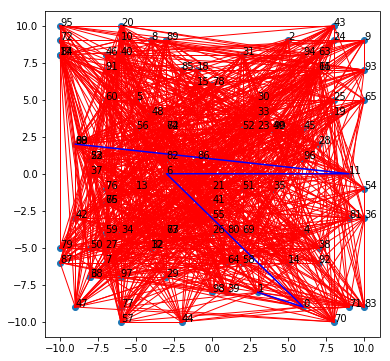

In [6]:
# create a list of nodes from a list of keys of nodes
path_node = []
for key in path_by_key:
    path_node.append(nodes[key])

# visualize the path in blue line on the graph
visualize_graph(nodes, path_node)

In [7]:
from heapq import heappush, heappop

def dijkstra(nodes,start,end):
    distances = [float('inf') for i in range(len(nodes))] #initialize distances
    parents = [-1 for i in range(len(nodes))]
    distances[start]=0
    que=[start]
    while que:
        state=heappop(que)
        if state==end:
            break
        for neigh in nodes[state].neighbors_and_weights:
            dist_from_state=distances[state]+neigh[1] # neigh[1] = weight of neigh
            if dist_from_state<distances[neigh[0]]:
                distances[neigh[0]]=dist_from_state                
                parents[neigh[0]]=state #Keeps track of the parent
                if distances[neigh[0]]<float('inf'):
                    heappush(que,neigh[0])
    if distances[end]==float('inf'):
        print "No path"
        return [-1,[]]
    path=[end]
    cur_par=end
    while cur_par!=start:
        path.append(parents[cur_par])
        cur_par=parents[cur_par]
    return [distances[end],path]

In [8]:
print dijkstra(nodes,1,99)

[116, [99, 11, 6, 0, 1]]


In [9]:
from heapq import heappush, heappop
import math

def h_score(curnode,endnode,effect):
    return effect*math.sqrt((curnode.x_coord-endnode.x_coord)**2+(curnode.y_coord-endnode.y_coord)**2)

def Astar_2(nodes,start,end,effect):
    parents = [-1 for i in range(len(nodes))]
    g_score = [float('inf') for i in range(len(nodes))]
    f_score = [float('inf') for i in range(len(nodes))]
    g_score[start]=0
    f_score[start]=h_score(nodes[start],nodes[end],effect)
    que=[]
    heappush(que,(f_score[start],nodes[start]))
    while que:
        cur=heappop(que)[1]
        if cur.key==end:
            break
        for neigh in cur.neighbors_and_weights:
            g_score_neigh=g_score[cur.key]+neigh[1] # neigh[1] = weight of neigh
            if g_score_neigh<g_score[neigh[0]]:
                g_score[neigh[0]]=g_score_neigh
                f_score[neigh[0]]=g_score_neigh+h_score(nodes[neigh[0]],nodes[end],effect)
                parents[neigh[0]]=cur.key #Keeps track of the parent
                if f_score[neigh[0]]<float('inf'):
                    heappush(que,(f_score[neigh[0]],nodes[neigh[0]]))
    path=[end]
    cur_par=end
    while cur_par!=start:
        if parents[cur_par]==-1:
            return 'No path'
        path.append(parents[cur_par])
        cur_par=parents[cur_par]
    return [g_score[end],path]

In [10]:
print Astar_2(nodes,1,99,0.5)

[116, [99, 11, 6, 0, 1]]


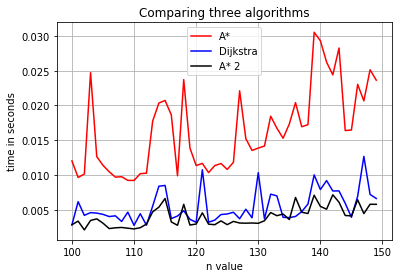

In [11]:
# comparing algorithms with randomnode
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50

first_alg_times = []
second_alg_times = []
third_alg_times = []

for k in range(100,iters+100):
    N=k
    P=.1
    nodes=randomnode(N,P)
    time_prev =time.time()
    A_star(nodes,0,k-1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,1,k-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k-1,0.5)
    third_alg_times.append(time.time()-time_prev)
    
plt.plot(range(100,iters + 100),first_alg_times,color='red', label = 'A*') # red is A_star
plt.plot(range(100,iters + 100),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.plot(range(100,iters + 100),third_alg_times,color='black', label = 'A* 2') # black is Astar_2
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()

In [12]:
def seqgraph(n): # create n**2 nodes graph
    nodes=[]
    effect=0.5 # half a minute(30 seconds) per unit length
    index=0
    side=2*effect # weight for side edges (larger than 1 to make side weight more)
    diagonal=1.4142*effect # weight for diagonal edges, sqrt(2)=1.4142
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+1,side),(index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index+1,side),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+n,side),(index+n-1,diagonal)]
            nodes.append(node)  
        index=index+1
    for y in range(1,n-1):
        for x in range(n):
            if x!=0 and x!=n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side),
                                            (index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==0:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side),(index+n-1,diagonal),(index+n,side)]
                nodes.append(node)
            index=index+1
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side)]
            nodes.append(node)  
        index=index+1
    return nodes

number=10
k=99
seqnodes=seqgraph(number)
print seqnodes[k].key
print seqnodes[k].x_coord,seqnodes[k].y_coord
print seqnodes[k].neighbors_and_weights
print Heuristic(seqnodes[0],seqnodes[k])

99
9 9
[(88, 0.7071), (89, 1.0), (98, 1.0)]
6.36396103068


99
88
77
66
55
44
33
22
11
0


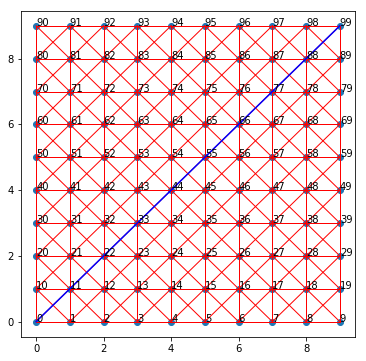

In [13]:
A_star(seqnodes,0,99)

# path list of key
path_by_key = []

#print nodes[99].g_score
if pathTo[99]==-1:
    print 'No path'
else:
    path_by_key = retrieve_path(pathTo, 0, 99) 

# create a list of nodes from a list of keys of nodes
path_node = []
for key in path_by_key:
    path_node.append(seqnodes[key])

# visualize the path in blue line on the graph
visualize_graph(seqnodes, path_node)

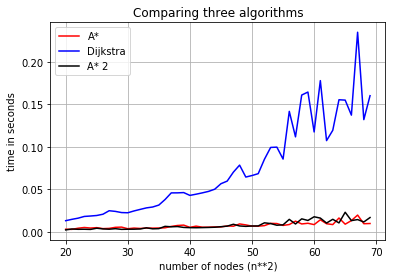

In [14]:
# comparing algorithms with seqgraph
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=20

first_alg_times = []
second_alg_times = []
third_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=seqgraph(N)
    time_prev =time.time()
    A_star(nodes,0,k**2-1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k**2-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,0.5)
    third_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*') # red is A_star
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A* 2') # black is Astar_2
plt.legend()

plt.xlabel('number of nodes (n**2)')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()
# this takes more time to run

In [15]:
def straightlinegraph(n): # create a straight line graph with n nodes
    nodes=[]
    index=0
    side=1
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+1,side)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index+1,side)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side)]
            nodes.append(node)  
        index=index+1
    return nodes

number=100
k=99
linenodes=straightlinegraph(number)
print linenodes[k].key
print linenodes[k].x_coord,seqnodes[k].y_coord
print linenodes[k].neighbors_and_weights
print Heuristic(linenodes[0],linenodes[k])

99
99 9
[(98, 1)]
49.5


99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


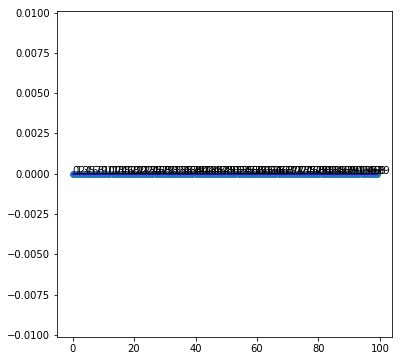

In [16]:
A_star(linenodes,0,99)

# path list of key
path_by_key = []
N=100

#print nodes[99].g_score
if pathTo[99]==-1:
    print 'No path'
else:
    path_by_key = retrieve_path(pathTo, 0, 99) 

# create a list of nodes from a list of keys of nodes
path_node = []
for key in path_by_key:
    path_node.append(linenodes[key])

# visualize the path in blue line on the graph
visualize_graph(linenodes, path_node)

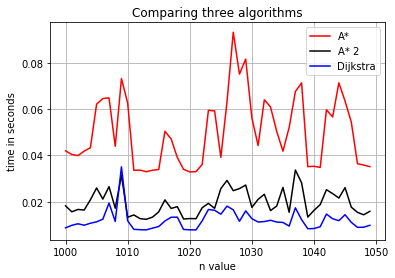

In [17]:
# comparing algorithms with straightlinegraph
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=1000

first_alg_times = []
second_alg_times = []
third_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=straightlinegraph(N)
    time_prev =time.time()
    A_star(nodes,0,k-1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k-1,0.5)
    third_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*') # red is A_star
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A* 2') # black is Astar_2
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()

In [18]:
# side weight < diagonal weight
def seqgraph2(n,side_effect,diagonal_effect): # create n**2 nodes graph
    nodes=[]
    index=0
    side=1*side_effect # weight for side edges
    diagonal=1.4142*diagonal_effect # weight for diagonal edges, sqrt(2)=1.4142
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+1,side),(index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index+1,side),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+n,side),(index+n-1,diagonal)]
            nodes.append(node)  
        index=index+1
    for y in range(1,n-1):
        for x in range(n):
            if x!=0 and x!=n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side),
                                            (index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==0:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side),(index+n-1,diagonal),(index+n,side)]
                nodes.append(node)
            index=index+1
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side)]
            nodes.append(node)  
        index=index+1
    return nodes

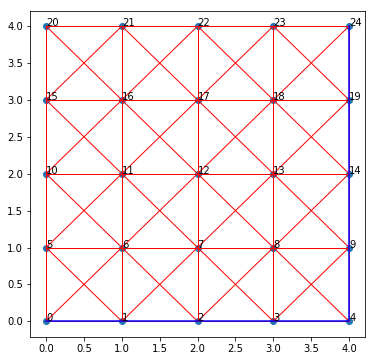

In [19]:
nodes=seqgraph2(5,1,2) # diagonal weight > side weight
path_by_key=dijkstra(nodes,0,24)[1]
path_node = []
for key in path_by_key:
    path_node.append(nodes[key])

# visualize the path in blue line on the graph
visualize_graph(nodes, path_node)

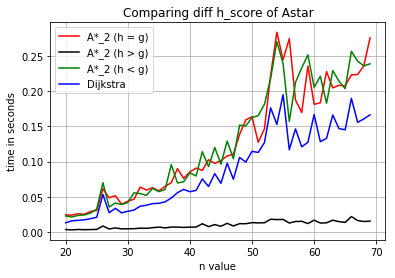

In [20]:
# comparing diff h_score
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=20

first_alg_times = []
second_alg_times = []
third_alg_times = []
forth_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=seqgraph2(N,1,2) # diagonal weight > side weight
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k**2-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,2)
    third_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,0.5)
    forth_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*_2 (h = g)')   # red is Astar_2 with h_score=g_score
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A*_2 (h > g)') # black is Astar_2 with h_score>g_score
plt.plot(range(at_least,iters + at_least),forth_alg_times,color='green', label = 'A*_2 (h < g)') # green is Astar_2 with h_score<g_score
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing diff h_score of Astar')
plt.grid(True)

plt.show()
# need more time to run

In [21]:
# comparing path
nodes=seqgraph2(5,1,2) # diagonal weight > side weight
print 'h_score=g_score: ',Astar_2(nodes,0,24,1)
print 'h_score<g_score: ',Astar_2(nodes,0,24,0.5)
print 'h_score>g_score: ',Astar_2(nodes,0,24,2)

h_score=g_score:  [8, [24, 23, 18, 13, 12, 7, 6, 5, 0]]
h_score<g_score:  [8, [24, 23, 18, 13, 12, 7, 6, 5, 0]]
h_score>g_score:  [8.8284, [24, 18, 13, 12, 7, 6, 5, 0]]


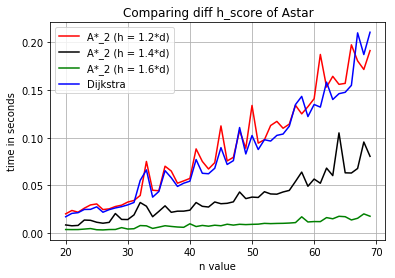

In [22]:
# comparing diff h_score with h_score>g_score
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=20

first_alg_times = []
second_alg_times = []
third_alg_times = []
forth_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=seqgraph2(N,1,2) # diagonal weight > side weight
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1.2)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k**2-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1.4)
    third_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1.6)
    forth_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*_2 (h = 1.2*d)')   # red is Astar_2 with h_score=1.2*distance
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A*_2 (h = 1.4*d)') # black is Astar_2 with h_score=1.4*distance
plt.plot(range(at_least,iters + at_least),forth_alg_times,color='green', label = 'A*_2 (h = 1.6*d)') # green is Astar_2 with h_score=1.6*distance
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing diff h_score of Astar')
plt.grid(True)

plt.show()
# need more time to run

In [23]:
# comparing path
nodes=seqgraph2(5,1,2) # diagonal weight > side weight
print 'dijkstra:             ',dijkstra(nodes,0,24)
print 'h_score=1.2*distance: ',Astar_2(nodes,0,24,1.2)
print 'h_score=1.4*distance: ',Astar_2(nodes,0,24,1.4)
print 'h_score=1.6*distance: ',Astar_2(nodes,0,24,1.6)

dijkstra:              [8, [24, 19, 14, 9, 4, 3, 2, 1, 0]]
h_score=1.2*distance:  [8, [24, 19, 18, 17, 12, 11, 6, 1, 0]]
h_score=1.4*distance:  [8, [24, 19, 18, 17, 12, 11, 6, 1, 0]]
h_score=1.6*distance:  [8, [24, 19, 18, 17, 12, 11, 6, 1, 0]]


### PRE-PROCESSING BY "LANDMARKS"
Reference: https://www.microsoft.com/en-us/research/wp-content/uploads/2004/07/tr-2004-24.pdf <br>
Motivation: The dillemma between 'speed' and 'memory' is always underlining in the problem of finding the shortest path using A* Search Algorithm. <br>
Limitation: the memory allocation of pre-processed distances between a node and any landmark may cause a worse memory complexity <br>
<br>

(1) To make $n^2$ number of landmarks, they would be pre-assigned as the centers of $n^2$ partition.

In [24]:
import math

class partitions:
    def __init__(self, _max, _min, n_sq):
        x_partition = []
        y_partition = []
        # make the n^2 partititions
        x_len = _max[0]-_min[0]
        y_len = _max[1]-_min[1]
        n = math.sqrt(n_sq)
        for i in range(int(n)+1):
            x_partition.append(_min[0] + i*(x_len/n))
            y_partition.append(_min[1] + i*(y_len/n))
            
        landmark = []
        n = math.sqrt(n_sq)
        # the center of each partitions is the landmarks
        for i in range(int(n)):
            for j in range(int(n)):
                landmark.append(((x_partition[i] + x_partition[i+1])/2,(y_partition[j] + y_partition[j+1])/2))
        
        self.x_partition = x_partition
        self.y_partition = y_partition
        self.landmark = landmark
    
    # to learn which landmark a node is closest to 
    def which_landmark(self, node):
        landmark_index = -1
        dist = 'inf'
        x = node.x_coord
        y = node.y_coord
        for i in range(len(self.landmark)):
            lm_x = self.landmark[i][0]
            lm_y = self.landmark[i][1]
            
            # eucledean distance between a landmark and a node
            new_dist = math.sqrt((x-lm_x)**2 + (y-lm_y)**2)
            #print new_dist, dist          # for debugging
            if new_dist < dist:
                dist = new_dist
                landmark_index = i
            
        return landmark_index

In [25]:
# a Eucledean distance from the closest landmark to the node
def distance_landmark_node(landmark_by_key, node, partition):
    landmark_index = landmark_by_key[node.key]
    xy_landmark = partition.landmark[landmark_index]
    rd = math.sqrt((xy_landmark[0] - node.x_coord)**2 + (xy_landmark[1] - node.y_coord)**2)
    return rd
    

def PP_Heuristic(current_node, terminal_node, partition, closest_landmark_list, preprocess):  # determines h_score - score of path from this vertex to goal - Euclidean
    current = current_node    # initial walking speed ~ 30 seconds per 50 meters(unit length) 
    goal = terminal_node      # can change this according to our map and increasing number of nodes
    
    current_node_closest_landmark_index = closest_landmark_list[current_node.key]
    terminal_node_closest_landmark_index = closest_landmark_list[terminal_node.key]
    
    current_ldmk_xy = partition.landmark[current_node_closest_landmark_index]
    terminal_ldmk_xy = partition.landmark[terminal_node_closest_landmark_index]
    
    # h = h'(current_node, closest_landmark_1) + Eucledean_distance(closest_landmark_1, closest_landmark_2)
    #          + h'(closest_landmark_2, terminal_node)
    Euclidean = preprocess[current_node.key] + math.sqrt((current_ldmk_xy[0] - terminal_ldmk_xy[0])**2 + 
                                                         (current_ldmk_xy[1] - terminal_ldmk_xy[1])**2) + preprocess[terminal_node.key]
    
    h_score = Euclidean * 0.5            # half a minute(30 seconds) per unit length
    
    return h_score                       # so all our scores will be in minutes

# adopting the change in heuristic function
def preprocessed_A_star(Nodes, start, end, partition, closest_landmark_list, preprocess):
    if start < 0 | start > v:
        return "The starting point doesn't exist in UCLA!"
    if end < 0 | end > v:
        return "The end point doesn't exist in UCLA!"
    
    closed_set = set()     # will store nodes that are visited
    open_set = set()       # will store nodes that are neighbors in the optimal path (minimaum f_score)
    
    goal = Nodes[end]
    entry = Nodes[start]                     # starting node
    entry.g_score = 0                        # starting node g_score is 0
    entry.f_score = PP_Heuristic(entry, goal, partition, closest_landmark_list, preprocess) 
    open_set.add((entry.f_score, entry))
    
    while (len(open_set) > 0):
        current = min(open_set)[1]       # pick node with lowest f_score
        
        if current == goal:
            return current.f_score      # returns estimated time - **can a function return 2 different value types?**
        
        open_set.remove((current.f_score, current))        # remove chosen node from open_set
        closed_set.add(current)                           # add chosen node to closed_set
        
        for i in current.neighbors_and_weights:
            if Nodes[i[0]] in closed_set:    # if Nodes[neighbor.key] is in closed set - do nothing
                continue                     
                                             # i[1] = weight of edge between current and neighbor
            g_new = current.g_score + i[1]   # compute new g_score
            
            if (Nodes[i[0]].f_score,Nodes[i[0]]) in open_set:  # if there is a duplicate of Nodes[neighbor.key] in open_set
                if Nodes[i[0]].g_score > g_new:   # compare new g_score and update if new score is lower
                    Nodes[i[0]].g_score = g_new
                    
            else:
                Nodes[i[0]].g_score = g_new                                 # if in neither, update g_score
                Nodes[i[0]].f_score = g_new + PP_Heuristic(Nodes[i[0]], goal, partition, closest_landmark_list, preprocess)
                pathTo[i[0]] = current.key                                     # record path to parent
                open_set.add((Nodes[i[0]].f_score, Nodes[i[0]]))            # add to open_set
                
    # Will not need to return anything here as our graph will be connected and will therfore always find a path.

In [26]:
p1 = partitions((10,10), (-10,-10), 9)
nodes = randomnode(100, 0.2)
# a list of closest landmark according to the index 'key'
closest_landmark = [-1 for node in nodes]
for key in range(len(nodes)):
    closest_landmark[key] = p1.which_landmark(nodes[key])
    
# creating a list with memory-complexity = O(N)
# it is a list of pre-computed distance from every node to its closest landmark
preprocess = []
for node in nodes:
     preprocess.append(distance_landmark_node(closest_landmark, node, p1))       
#print preprocess

preprocessed_A_star(nodes,0,99, p1, closest_landmark, preprocess)

105.33333333333333

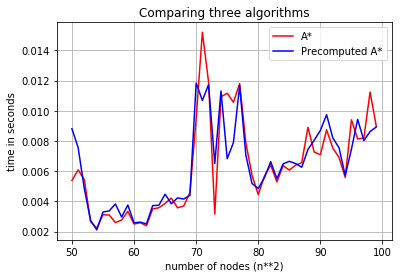

0.00628770828247
0.00633587360382


In [28]:
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50

first_alg_times = []
second_alg_times = []

for k in range(50,100):
    N=k
    P=.1
    nodes=randomnode(N,P)
    time_prev =time.time()
    A_star(nodes,0,k-1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()

    time_prev =time.time()
    preprocessed_A_star(nodes,0,k-1, p1, closest_landmark, preprocess)
    second_alg_times.append(time.time()-time_prev)

    
plt.plot(range(50,100),first_alg_times,color='red', label = 'A*') # red is A_star
plt.plot(range(50,100),second_alg_times,color='blue', label = 'Precomputed A*') # blue is dijkstra
plt.legend()

plt.xlabel('number of nodes (n**2)')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()
# this takes more time to run